# A Whale Off the Port(folio)

Harold's company has been investing in algorithmic trading strategies. 
Harold has come to you with a challenge—to help him determine which portfolio is performing the best across multiple areas: volatility, returns, risk, and Sharpe ratios.
You need to create a tool (an analysis notebook) that analyzes and visualizes the major metrics of the portfolios across all of these areas, and determine which portfolio outperformed the others. You will be given the historical daily returns of several portfolios: some from the firm's algorithmic portfolios, some that represent the portfolios of famous "whale" investors like Warren Buffett, and some from the big hedge and mutual funds. You will then use this analysis to create a custom portfolio of stocks and compare its performance to that of the other portfolios, as well as the larger market (S&P TSX 60 Index).
For this homework assignment, you have three main tasks:

- Read in and Wrangle Returns Data
- Determine Success of Each Portfolio
- Choose and Evaluate a Custom Portfolio

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path

%matplotlib inline 

## Whale Returns: Data Cleaning, Algorithmic Daily Returns

In [2]:
whale_df= pd.read_csv("../pandas_homework/whale_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [4]:
whale_df.isnull

<bound method DataFrame.isnull of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN 

In [5]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
whale_df.dropna(inplace=True)

In [7]:
whale_df.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algo Returns: Data Cleaning, Algorithmic Daily Returns

In [8]:
algo_df=pd.read_csv("../pandas_homework/algo_returns.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(ascending=True)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [9]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [10]:
algo_df.isnull

<bound method DataFrame.isnull of               Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]>

In [11]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
algo_df.dropna(inplace=True)

In [13]:
algo_df.sort_index(ascending=True)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## SP TSX 60 Returns: Data Cleaning, Algorithmic Daily Returns

In [14]:
sp_tsx_df=pd.read_csv("../pandas_homework/sp_tsx_history.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_df.sort_index(ascending=True)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [15]:
sp_tsx_df.dtypes

Close    object
dtype: object

In [16]:
sp_tsx_df.isnull().sum()

Close    0
dtype: int64

In [17]:
sp_tsx_df.dropna(inplace=True)

In [18]:
sp_tsx_df.sort_index(ascending=True)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [19]:
sp_tsx_df["Close"]=sp_tsx_df["Close"].replace({"\$":""},regex=True)
sp_tsx_df["Close"]=sp_tsx_df["Close"].replace({"\,":""},regex=True)

In [20]:
sp_tsx_df["Close"]=sp_tsx_df["Close"].astype(float)

In [21]:
sp_tsx_df=sp_tsx_df.pct_change()

In [22]:
sp_tsx_df=sp_tsx_df.rename(columns={"Close":"TSX 60"})

In [30]:
sp_tsx_df.sort_index(ascending=True, inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [42]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_df=pd.concat([whale_df, algo_df, sp_tsx_df],axis="columns",join="inner")
portfolio_df.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Conduct Quantitative Analysis
In this section, we are calculating and visualizing performance and risk metrics for the portfolios

## Performance Analysis

<AxesSubplot:title={'center':'Daily_Returns'}, xlabel='Date'>

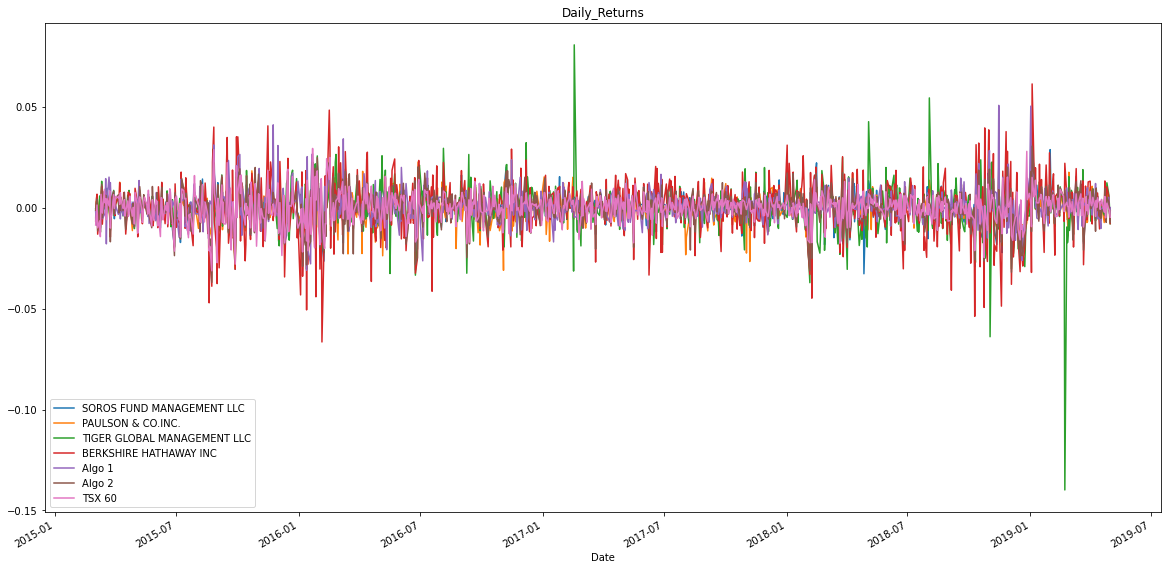

In [43]:
#Calculate and Plot the daily returns
portfolio_df.plot(figsize=(20,10),title="Daily_Returns")

<AxesSubplot:title={'center':'Cumulative_Returns'}, xlabel='Date'>

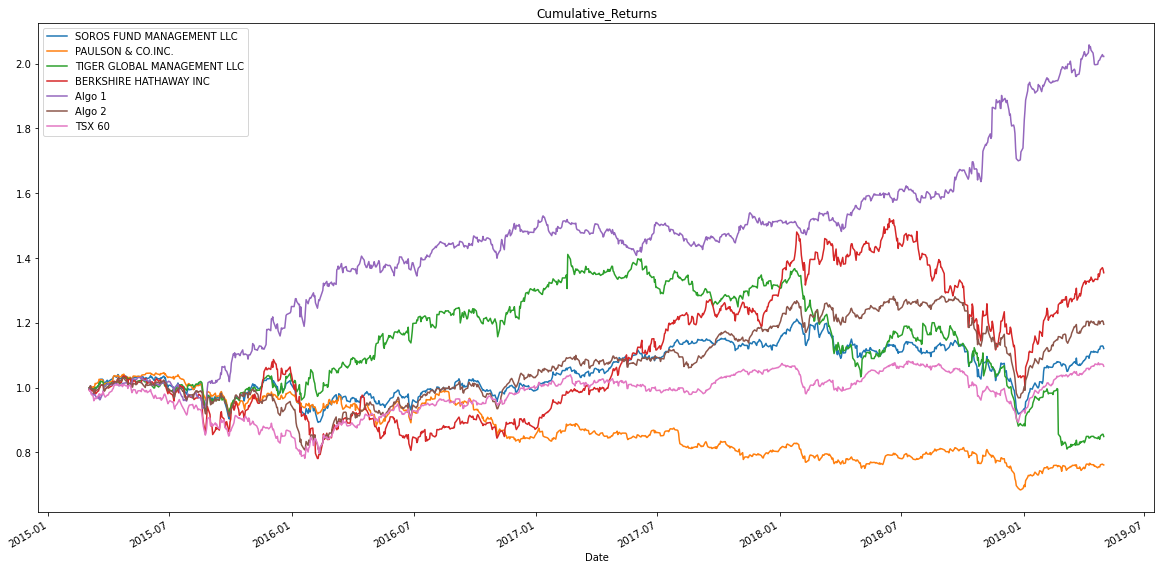

In [44]:
#Calculate cumulative returns of all portfolios
cumulative_returns_df=(1+portfolio_df).cumprod()
cumulative_returns_df.plot(figsize=(20,10), title="Cumulative_Returns")

## Risk Analysis
In this section, we are going to determine the risk of each portfolio: 

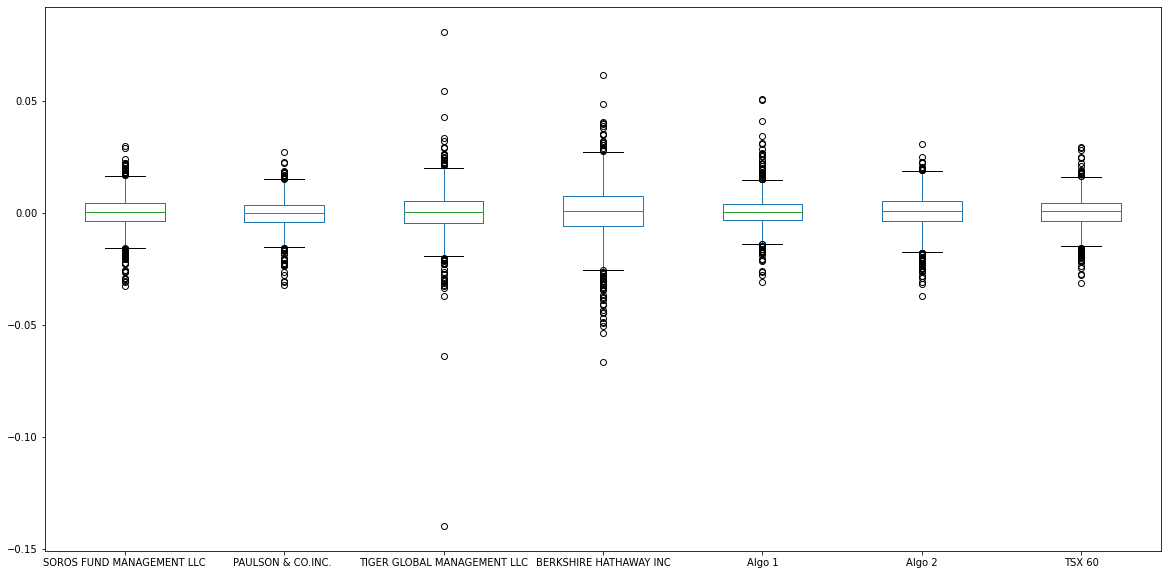

In [45]:
#Box plot for each portfolio to visually show risk 
portfolio_box_df=portfolio_df.boxplot(figsize=(20,10), grid=False)

In [46]:
#Daily Standard Deviations of all portfolios
portfolio_std_df=portfolio_df.std()
portfolio_std_df.sort_values(ascending=True, inplace=True)
portfolio_std_df

PAULSON & CO.INC.              0.006982
TSX 60                         0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

In [47]:
#Caculate STD of TSX60 and Determine which portfolios are riskier than TSX 60 
portfolio_std_df>portfolio_std_df["TSX 60"]

PAULSON & CO.INC.              False
TSX 60                         False
Algo 1                          True
SOROS FUND MANAGEMENT LLC       True
Algo 2                          True
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [48]:
#Annualized Standard Deviation (252 trading days)
annual_std_df=portfolio_df.std()*np.sqrt(252)
annual_std_df

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
TSX 60                         0.111664
dtype: float64

## Rolling Statistics
Risk changes over time. In this section, we are analizing the rolling statistics for Risk and Beta

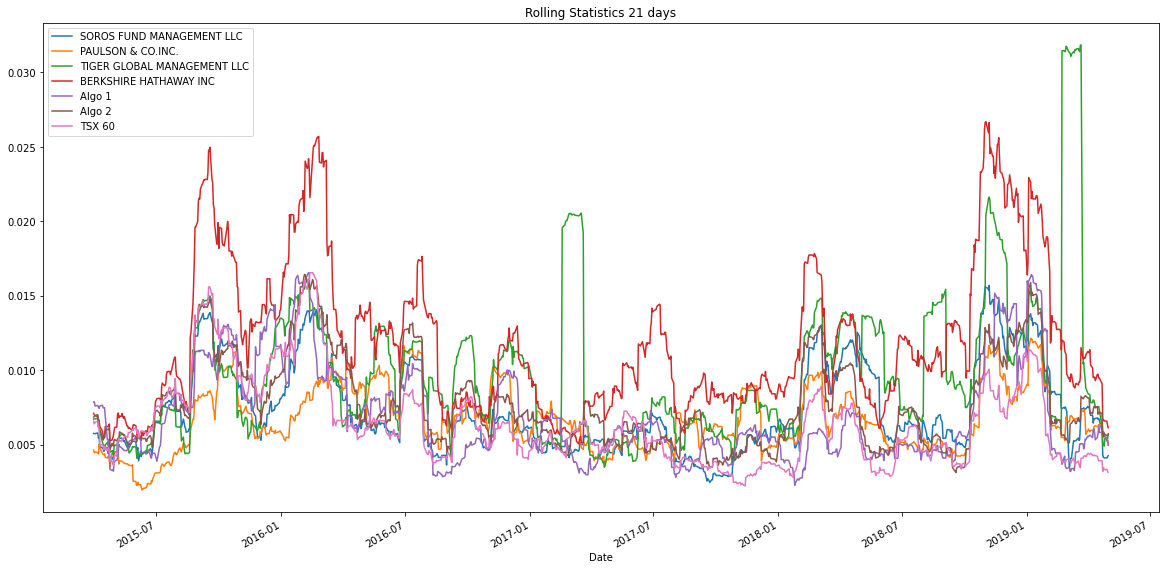

In [49]:
#Rolling Standard Deviation for all portfolios using a 21-day window
rolling_statistics_df=portfolio_df.rolling(window=21).std().plot(figsize=(20,10), title="Rolling Statistics 21 days")

In [52]:
import seaborn as sns
correlation_df=portfolio_df.corr()
correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

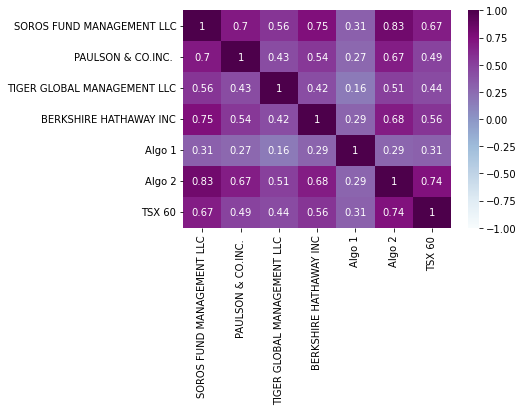

In [51]:
#Display correlation matrix
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True,cmap="BuPu")

## Plot Beta
In this section, we are calculating and Plot Beta for a chosen portfolio and the TSX 60 including:
- Covariance of a single portfolio
- Variance of TSX 60
- Computing beta including plot beta trend

<AxesSubplot:title={'center':'Rolling Beta'}, xlabel='Date'>

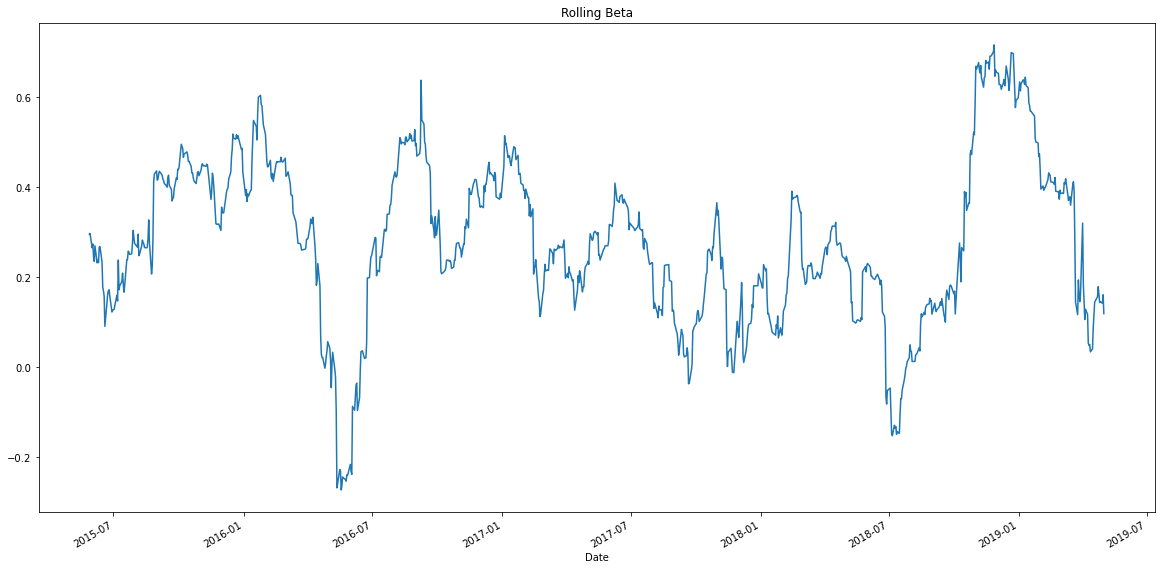

In [38]:
rolling_covariance=portfolio_df["Algo 1"].rolling(window=60).cov(portfolio_df["TSX 60"])
rolling_variance=portfolio_df["TSX 60"].rolling(window=60).var()
rolling_beta_df=rolling_covariance/rolling_variance
rolling_beta_df.plot(figsize=(20,10), title="Rolling Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average
An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. In this section, we are calculating the EWM with a 21-day half life for each portfolio using standard deviation as the metric of interest.

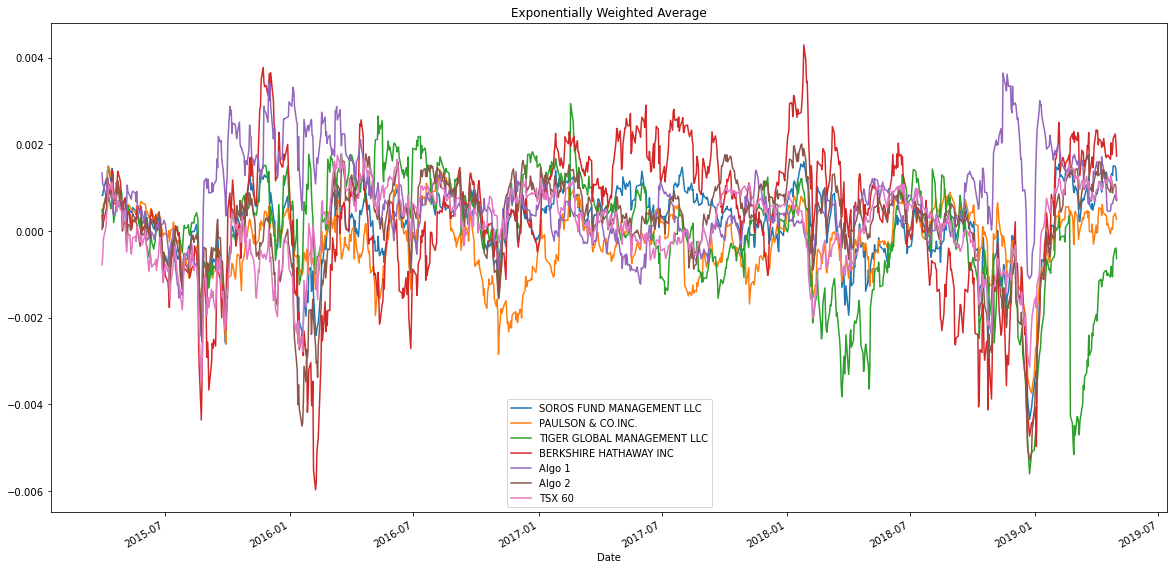

In [53]:
#Calculating the rolling window using ewm
ewm_df=portfolio_df.ewm(min_periods=21, halflife=21).mean().plot(figsize=(20,10), title="Exponentially Weighted Average")

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. In this section, we are calculating and visualizing the Sharpe ratios by applying daily returns, using a bar plot

In [54]:
#Annualized Sharpe Ratios
sharpe_ratios_df=(portfolio_df.mean()*252)/(portfolio_df.std()*np.sqrt(252))
sharpe_ratios_df

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
TSX 60                         0.195550
dtype: float64

<AxesSubplot:>

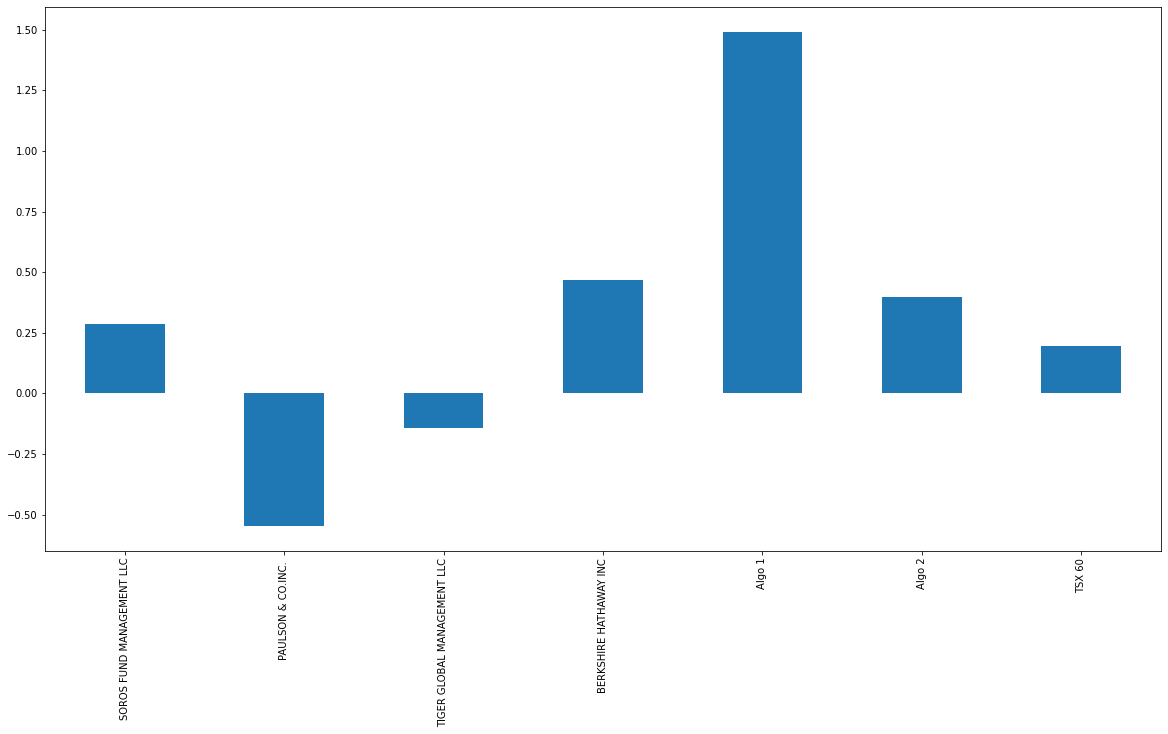

In [55]:
#Visualize the sharpe ratios as a bar plot
sharpe_ratios_df.plot(figsize=(20,10),kind="bar")

By analysing the Sharpe Ratios from the market (TSX 60) and the whales portfolios, we can conclude that the algorithmnic strategies outperformed in both of them. While Algo Returns ascend by %1.49  

## Custom Portfolio
In this section, we are building our own portfolio of stocks, by choosing 3 custom stocks with at last 1 year's worth of historic prices. We are also creating a DataFrame of the closing prices and dates for each stock by calculating the returns, and comparing the results to the Whale Portfolios and the S&P TSX 60.

In [56]:
#Reading Data from 1st stock
shop_df= pd.read_csv("../pandas_homework/shop_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.sort_index(ascending=True)

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [57]:
#Reading Data from 2nd stock
otex_df= pd.read_csv("../pandas_homework/otex_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.sort_index(ascending=True)

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [58]:
#Reading data from 3rd stock
l_df= pd.read_csv("../pandas_homework/l_historical.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df.sort_index(ascending=True)

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [59]:
#Combine all stoks in a single DataFrame
custom_portfolio_df=pd.concat([shop_df, otex_df, l_df],axis="columns",join="inner")
custom_portfolio_df.sort_index(ascending=True)

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86
...,...,...,...,...,...,...
2019-12-20,SHOP,513.22,OTEX,58.68,L,67.90
2019-12-23,SHOP,511.62,OTEX,57.89,L,67.68
2019-12-24,SHOP,525.39,OTEX,57.44,L,67.67


In [65]:
custom_portfolio_df.dtypes

Symbol     object
Close     float64
Symbol     object
Close     float64
Symbol     object
Close     float64
dtype: object

In [66]:
custom_portfolio_df.isnull

<bound method DataFrame.isnull of            Symbol   Close Symbol  Close Symbol  Close
Date                                                 
2018-01-02   SHOP  132.06   OTEX  43.58      L  57.99
2018-01-03   SHOP  135.15   OTEX  43.07      L  57.41
2018-01-04   SHOP  137.46   OTEX  42.91      L  57.42
2018-01-05   SHOP  137.26   OTEX  42.57      L  57.42
2018-01-08   SHOP  139.51   OTEX  42.16      L  56.86
...           ...     ...    ...    ...    ...    ...
2019-12-20   SHOP  513.22   OTEX  58.68      L  67.90
2019-12-23   SHOP  511.62   OTEX  57.89      L  67.68
2019-12-24   SHOP  525.39   OTEX  57.44      L  67.67
2019-12-27   SHOP  534.76   OTEX  57.70      L  67.78
2019-12-30   SHOP  517.79   OTEX  57.19      L  67.33

[501 rows x 6 columns]>

In [67]:
custom_portfolio_df.isnull().sum() 

Symbol    0
Close     0
Symbol    0
Close     0
Symbol    0
Close     0
dtype: int64

In [68]:
custom_portfolio_df.dropna(inplace=True)

In [69]:
custom_portfolio_df.sort_index(ascending=True)

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86
...,...,...,...,...,...,...
2019-12-20,SHOP,513.22,OTEX,58.68,L,67.90
2019-12-23,SHOP,511.62,OTEX,57.89,L,67.68
2019-12-24,SHOP,525.39,OTEX,57.44,L,67.67


In [70]:
custom_portfolio_df["Close"]=custom_portfolio_df["Close"].replace({"\":""},regex=True)
custom_portfolio_df["Close"]=custom_portfolio_df["Close"].replace({"\,":""},regex=True)

In [76]:
custom_portfolio_df["Close"]=custom_portfolio_df["Close"].astype(float)

## Join your portfolio to the DataFrame that contains all of the portfolio returns
Compare dates where return data exists for all the stocks (drop NaNs)

In [89]:
combined_portfolio_df=["custom_portfolio_df","portfolio_df"]
combined_portfolio_df

['custom_portfolio_df', 'portfolio_df']

In [91]:
combined_portfolio_df=pd.concat([whale_df, algo_df, sp_tsx_df, shop_df, otex_df, l_df], axis="columns",join="inner")
combined_portfolio_df.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,,,,,,,,
2018-01-02,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,SHOP,139.51,OTEX,42.16,L,56.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,SHOP,295.37,OTEX,51.73,L,65.36
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,SHOP,299.10,OTEX,51.77,L,65.12
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,SHOP,303.04,OTEX,51.45,L,65.31


In [92]:
combined_portfolio_df.dropna(inplace=True)

In [94]:
combined_portfolio_df.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,,,,,,,,
2018-01-02,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,SHOP,139.51,OTEX,42.16,L,56.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,SHOP,295.37,OTEX,51.73,L,65.36
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,SHOP,299.10,OTEX,51.77,L,65.12
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,SHOP,303.04,OTEX,51.45,L,65.31


## Risk Analysis

In [97]:
#Calculate the annualized Standard Deviation
portfolio_std_df=combined_portfolio_df.std()
portfolio_std_df.sort_values(ascending=True, inplace=True)
portfolio_std_df

/var/folders/w1/48020hx94kn5jmxmf93_7lr80000gn/T/ipykernel_75129/3006252067.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  portfolio_std_df=combined_portfolio_df.std()


TSX 60                          0.006244
PAULSON & CO.INC.               0.007241
Algo 1                          0.007550
Algo 2                          0.008711
SOROS FUND MANAGEMENT LLC       0.009198
TIGER GLOBAL MANAGEMENT LLC     0.013828
BERKSHIRE HATHAWAY INC          0.014407
Close                           2.971632
Close                           4.102482
Close                          38.768085
dtype: float64

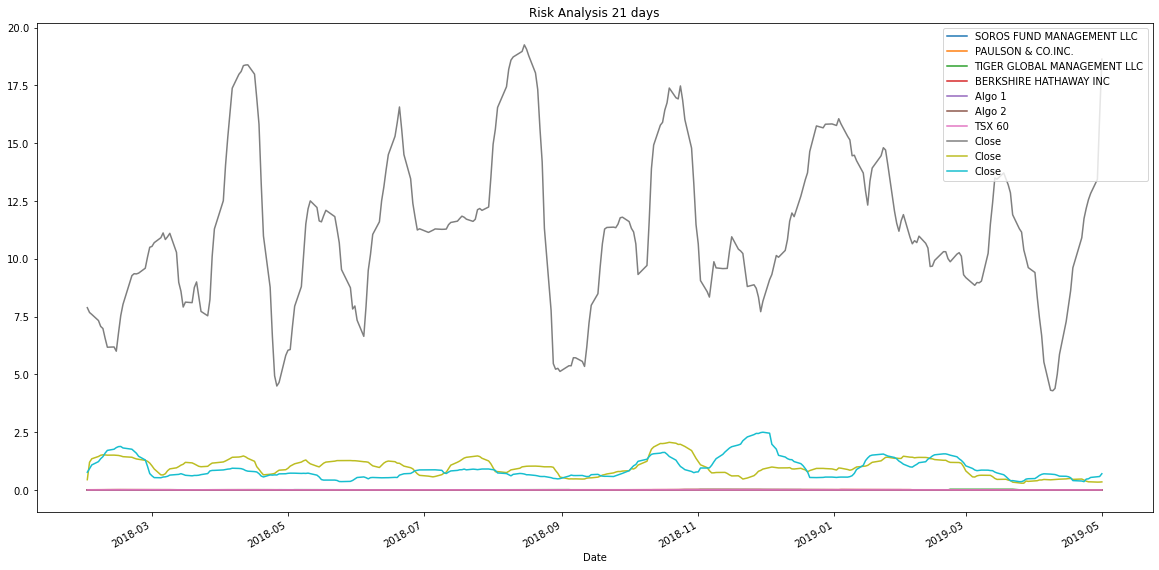

In [98]:
#Calculate and plot STD with 21-day window
portfolio_std_df=combined_portfolio_df.rolling(window=21).std().plot(figsize=(20,10), title="Risk Analysis 21 days")

## Correlation

In [99]:
import seaborn as sns
correlation_df=combined_portfolio_df.corr()
correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX 60,Close,Close,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.766254,0.523392,0.784293,0.304575,0.835815,0.687815,0.090680,0.081334,0.086346
PAULSON & CO.INC.,0.766254,1.000000,0.531213,0.652229,0.318700,0.800032,0.624946,0.072316,0.081662,0.027254
TIGER GLOBAL MANAGEMENT LLC,0.523392,0.531213,1.000000,0.379911,0.130795,0.480772,0.437297,0.026132,0.034603,0.019093
BERKSHIRE HATHAWAY INC,0.784293,0.652229,0.379911,1.000000,0.292936,0.786008,0.650775,0.071471,0.021144,0.081861
Algo 1,0.304575,0.318700,0.130795,0.292936,1.000000,0.320198,0.284499,-0.010828,-0.044487,-0.015534
Algo 2,0.835815,0.800032,0.480772,0.786008,0.320198,1.000000,0.754681,0.079017,0.080326,0.076720
TSX 60,0.687815,0.624946,0.437297,0.650775,0.284499,0.754681,1.000000,0.113272,0.104663,0.113964
Close,0.090680,0.072316,0.026132,0.071471,-0.010828,0.079017,0.113272,1.000000,0.760160,0.765180
Close,0.081334,0.081662,0.034603,0.021144,-0.044487,0.080326,0.104663,0.760160,1.000000,0.531064
Close,0.086346,0.027254,0.019093,0.081861,-0.015534,0.076720,0.113964,0.765180,0.531064,1.000000


<AxesSubplot:>

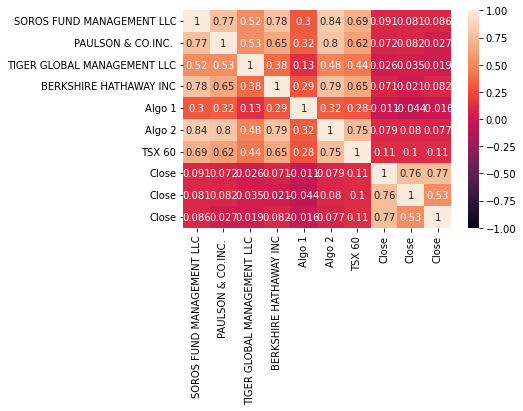

In [100]:
#Display correlation matrix
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True)

## 60-day Rolling Beta

In [102]:
rolling_covariance=combined_portfolio_df["Close"].rolling(window=60).cov(combined_portfolio_df["Algo 1"])

In [103]:
rolling_variance=combined_portfolio_df["Algo 1"].rolling(window=60).var()

<AxesSubplot:title={'center':'Rolling Beta'}, xlabel='Date'>

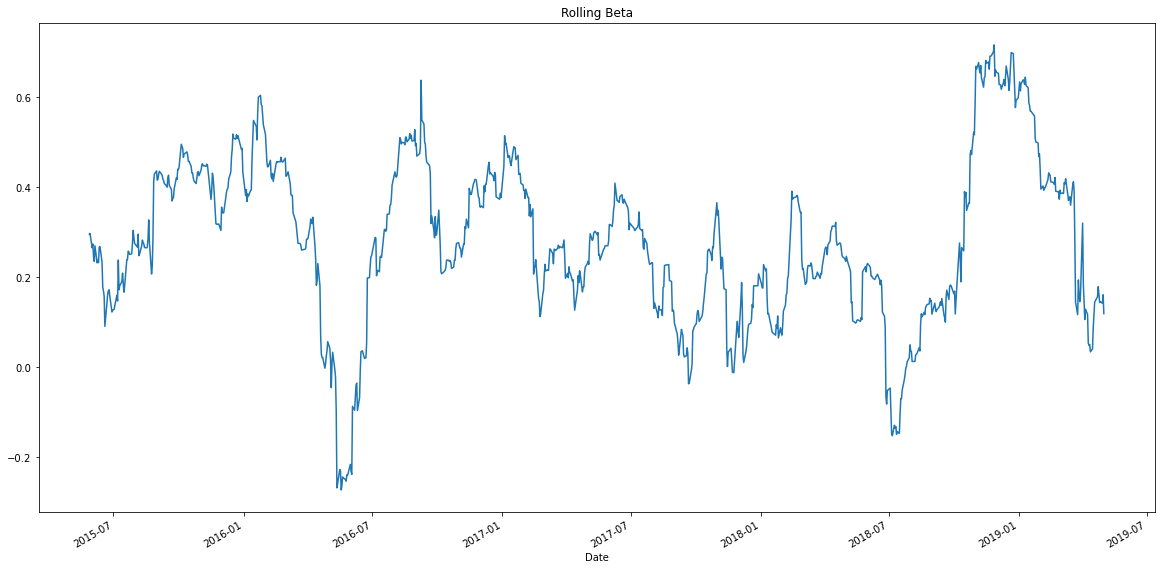

In [107]:
rolling_beta_df.plot(figsize=(20,10), title="Rolling Beta")

## Calculating and Visualizing Sharpe Ratios

In [108]:
#Calculate Annualized Sharpe Ratios
sharpe_ratios_df=(combined_portfolio_df.mean()*252)/(combined_portfolio_df.std()*np.sqrt(252))
sharpe_ratios_df

/var/folders/w1/48020hx94kn5jmxmf93_7lr80000gn/T/ipykernel_75129/690364435.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sharpe_ratios_df=(combined_portfolio_df.mean()*252)/(combined_portfolio_df.std()*np.sqrt(252))


SOROS FUND MANAGEMENT LLC       -0.011416
PAULSON & CO.INC.               -0.292758
TIGER GLOBAL MANAGEMENT LLC     -1.406053
BERKSHIRE HATHAWAY INC           0.298127
Algo 1                           1.906586
Algo 2                           0.116630
TSX 60                           0.082631
Close                           81.744226
Close                          250.227506
Close                          227.714574
dtype: float64

<AxesSubplot:>

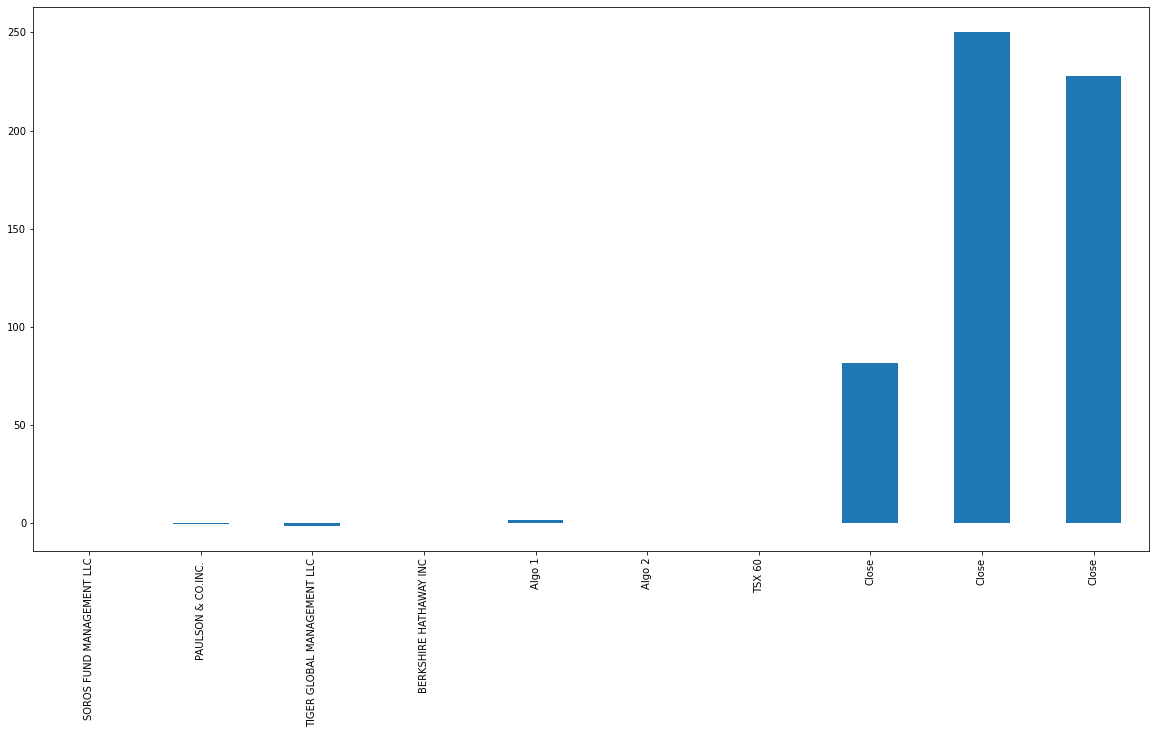

In [109]:
#Visualize the sharpe ratios
sharpe_ratios_df.plot(figsize=(20,10),kind="bar")

## Final Analysis
By combining both portfolios, I can conclude that my selected stocs "OTEX", "SHOP", "L" incredibly outperform the overall market. 